# Task 5.3. Two-threshold binaryisation 3.1 - 3.4
---
***Author: Piotr Skalski***

## Imports

In [1]:
import numpy as np
import cv2
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## Settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "bart.bmp"

## Loading image

In [3]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

## Display the histogram

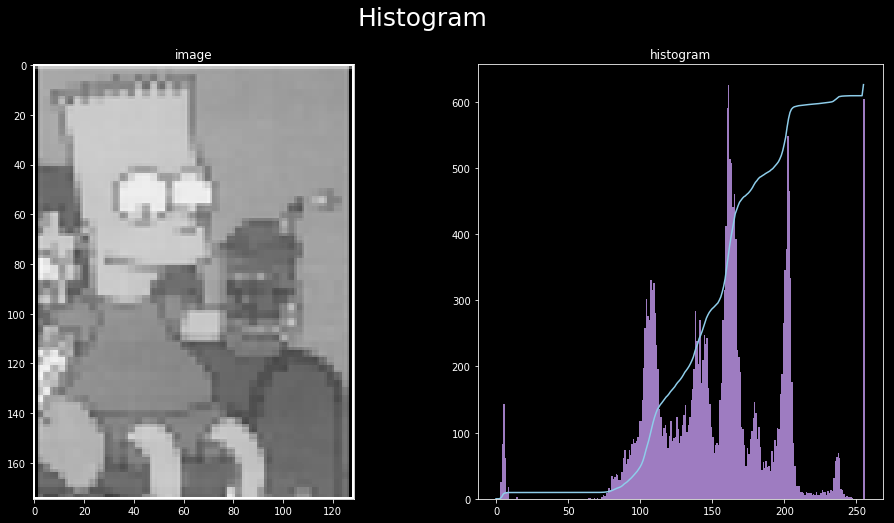

In [4]:
# creation of a cumulative histogram
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()

## Sampling the image at the selected location

In [5]:
def sample_image(I, x, y):
    print("Image[{}, {}] = {}".format(x, y, I[x, y]))

In [6]:
sample_image(image, 20, 20)

Image[20, 20] = 202


## Two-threshold binaryisation

### Settings

In [34]:
THRESH_HOLD_DOWN = 191
THRESH_HOLD_UP = 210

In [35]:
output_image = (image > THRESH_HOLD_DOWN) & (image < THRESH_HOLD_UP)
output_image = output_image.astype(int) * 255

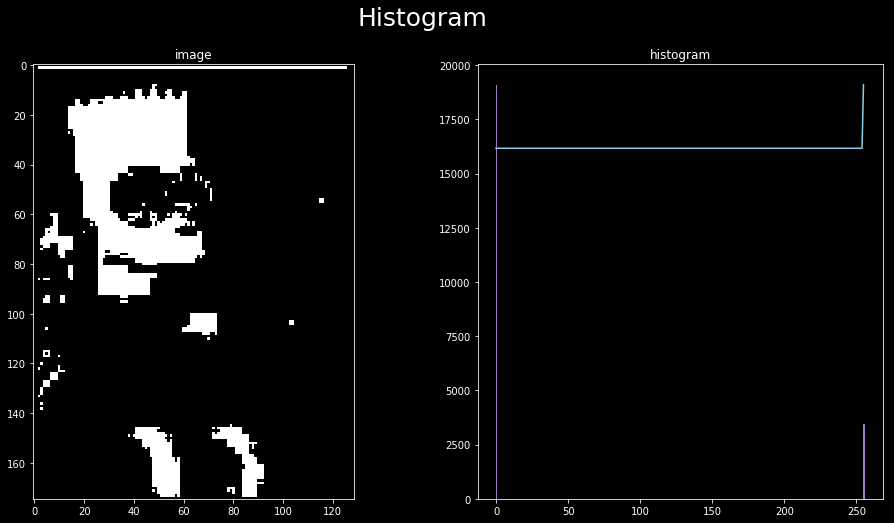

In [36]:
# creation of a cumulative histogram
hist,bins = np.histogram(output_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_base = cdf * hist.max()/ cdf.max()

plt.style.use('dark_background')
fig = plt.figure(figsize=(16,8))
fig.suptitle('Histogram', fontsize = 25)
ax1 = fig.add_subplot(121)
ax1.imshow(output_image, 'gray')
ax1.set_title("image")

ax2 = fig.add_subplot(122)
ax2.hist(output_image.ravel(), 256, [0,256], color = '#9E7CC1')
ax2.plot(cdf_base, color = '#8ECDEA')
ax2.set_title("histogram")

plt.show()